<a href="https://colab.research.google.com/github/SmartPracticeschool/SPS-6019-Credit-Card-Fraud-Prediction-using-IBM-Auto-AI/blob/main/Devisha_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#This a Program worked by Devisha Tiwari To recognize Handwritten Digits using Tensorflow and Keras.

In [13]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

In [6]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


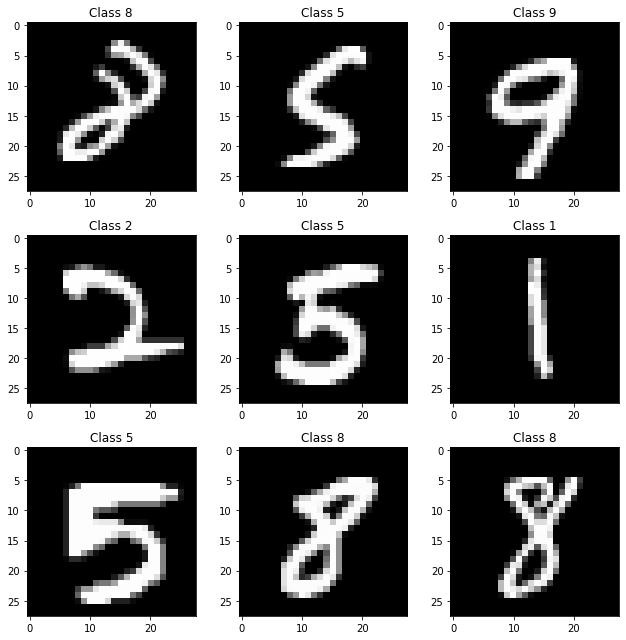

In [7]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [8]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0   16  104  178  253  255  253  253  103    0    0  147  253  63  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0  166  252  252  202  184   84  190  252    0   38  234  252  38  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0  216  252  136    6    0    0  123  252    0   95  252  214   0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0  141  252  243   25    0   51  246  202   76  243  252   40   0  0  0  0  0 

In [9]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [10]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [11]:
model = Sequential()